In [71]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_gradle
import regex_maven
import rq_aux
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import numpy as np

importlib.reload(regex_gradle)
importlib.reload(regex_maven)
importlib.reload(rq_aux)
sns.set(color_codes=True)
sns.set_style("whitegrid")
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [72]:
rq_aux.check_categories(regex_maven)

rq_aux.check_categories(regex_gradle)

In [73]:
noerror = False
output_path = "../data/output_data/"
#overview_dataset = "overview-subtask-noerror-True.csv"
#overview_dataset = f"{output_path}overview_daylight_witherror.csv"
#alltasks_dataset = f"{output_path}all_tasks_witherror.csv"

overview_dataset = f"{output_path}overview_cloc2_witherror.csv"
alltasks_dataset = f"{output_path}all_tasks_cloc2_witherror.csv"

In [74]:
# Read Data Frame: Workflow has Subtasks that failed
df = pd.read_csv(overview_dataset)

In [75]:
df_maven = df[df["is_maven"]]
df_gradle = df[df["is_gradle"]]
df_both = df[df["is_maven"] & df["is_gradle"]]
df_none = df[(df["is_maven"] == False) & (df["is_gradle"] == False)]

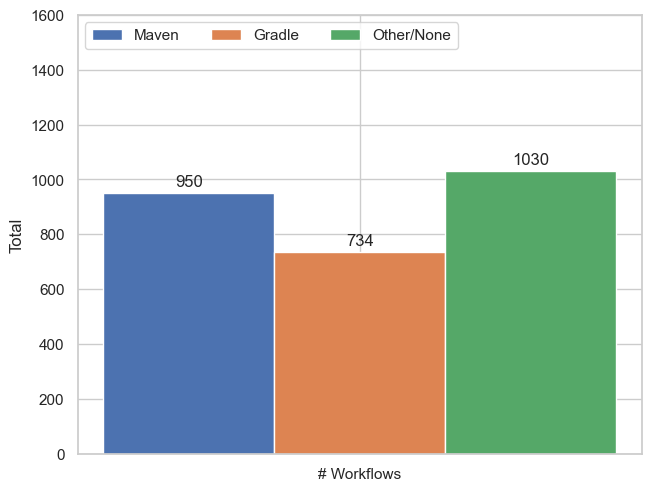

In [76]:
properties = ["# Workflows"]

bars = {
    'Maven':  len(df_maven),
    'Gradle': len(df_gradle),
    #'Other/None':  len(df) - len(df_maven) - len(df_gradle) + len(df_both),
    'Other/None' : len(df_none),
}

title = 'Number of Workflows by Build Automation Tool'
title = ''

rq_aux.plot_bars(properties, bars, title, lim=1600, ylabel = "Total")

In [77]:
# Remove Maven Workflows Without Maven Subtasks
df_maven = rq_aux.remove_workflows_no_subtask(df_maven, 'maven_', regex_maven.plugins)

Workflows No Subtask: Removed 207 workflows: 950 -> 743


In [78]:
# Remove Gradle Workflows Without Gradle Subtasks
df_gradle = rq_aux.remove_workflows_no_subtask(df_gradle, 'gradle_', regex_gradle.plugins)

Workflows No Subtask: Removed 306 workflows: 734 -> 428


In [79]:
df_maven_size = rq_aux.create_dfs_size(df_maven, 'is_maven')

sum_maven = {}
for x in sizes2:
  sum_maven[x] = rq_aux.make_dict_subtask(df_maven_size[x], "maven_", regex_maven.plugins)

for key, value in sum_maven.items():
    rq_aux.print_ratios_summary(key.title(), value, sum_maven['all'])

*** All ***
N_Work:  743 (100.0%);  N:  138385 (100.0%);  Energy:  22214413 (100.0%);  Seconds:  1219003731474 (100.0%);  
*** Small ***
N_Work:  88 (11.8%);  N:  7767 (5.6%);  Energy:  627180 (2.8%);  Seconds:  36114694085 (3.0%);  
*** Medium ***
N_Work:  378 (50.9%);  N:  50629 (36.6%);  Energy:  10799508 (48.6%);  Seconds:  532022423383 (43.6%);  
*** Large ***
N_Work:  277 (37.3%);  N:  79989 (57.8%);  Energy:  10787725 (48.6%);  Seconds:  650866614006 (53.4%);  


In [80]:
df_gradle_size = rq_aux.create_dfs_size(df_gradle, 'is_gradle')

sum_gradle = {}
for x in sizes2:
  sum_gradle[x] = rq_aux.make_dict_subtask(df_gradle_size[x], "gradle_", regex_gradle.plugins)

for key, value in sum_gradle.items():
    rq_aux.print_ratios_summary(key.title(), value, sum_gradle['all'])

*** All ***
N_Work:  428 (100.0%);  N:  46150 (100.0%);  Energy:  6464551 (100.0%);  Seconds:  300216335895 (100.0%);  
*** Small ***
N_Work:  41 (9.6%);  N:  1213 (2.6%);  Energy:  164351 (2.5%);  Seconds:  8000380883 (2.7%);  
*** Medium ***
N_Work:  240 (56.1%);  N:  17029 (36.9%);  Energy:  2115760 (32.7%);  Seconds:  96022613651 (32.0%);  
*** Large ***
N_Work:  147 (34.3%);  N:  27908 (60.5%);  Energy:  4184440 (64.7%);  Seconds:  196193341361 (65.4%);  


*** Maven ***
All:  26853475 (24.9%);  Small:  639852 (30.8%);  Medium:  12203729 (37.1%);  Large:  14009894 (19.2%);  
*** Maven Plugins ***
All:  22214413 (20.6%);  Small:  627180 (30.2%);  Medium:  10799508 (32.9%);  Large:  10787725 (14.8%);  
*** Gradle ***
All:  6265421 (5.8%);  Small:  154254 (7.4%);  Medium:  2299293 (7.0%);  Large:  3811874 (5.2%);  
*** Gradle Tasks ***
All:  6464551 (6.0%);  Small:  164351 (7.9%);  Medium:  2115760 (6.4%);  Large:  4184440 (5.7%);  


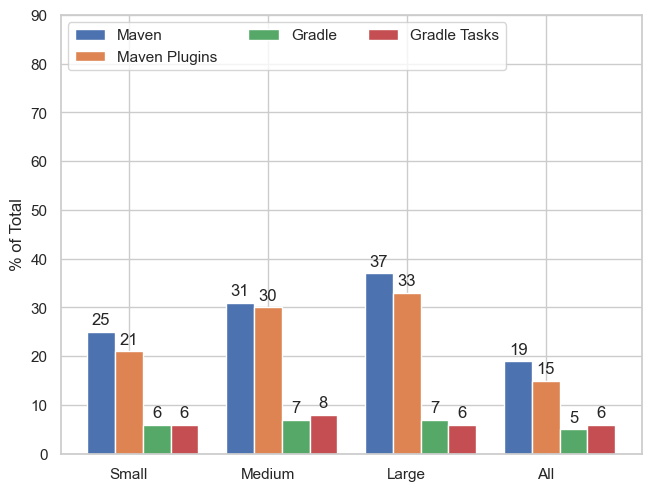

In [81]:
bar_energy = {
    "maven" :  {},
    "mav_tasks": {},
    "gradle" : {},
    "grad_tasks" : {},
    "total"  : {}
}

for x in sizes2:
    bar_energy["maven"][x]   = df_maven_size[x]["maven_energy"].sum()
    bar_energy["mav_tasks"][x]   = sum_maven[x]["energy"]
    bar_energy["gradle"][x]  = df_gradle_size[x]["gradle_energy"].sum()
    bar_energy["grad_tasks"][x]  = sum_gradle[x]["energy"].sum()
    bar_energy["total"][x]   = df_maven_size[x]["energy"].sum() + df_gradle_size[x]["energy"].sum()

rq_aux.print_ratios_summary("Maven",          bar_energy["maven"],  bar_energy["total"])
rq_aux.print_ratios_summary("Maven Plugins",  bar_energy["mav_tasks"],  bar_energy["total"])
rq_aux.print_ratios_summary("Gradle",         bar_energy["gradle"], bar_energy["total"])
rq_aux.print_ratios_summary("Gradle Tasks",   bar_energy["grad_tasks"], bar_energy["total"])

properties  = ("Small", "Medium", "Large", "All")

bars = {
    'Maven':  rq_aux.get_ratios(bar_energy["maven"],  bar_energy["total"], 0),
    'Maven Plugins':  rq_aux.get_ratios(bar_energy["mav_tasks"],  bar_energy["total"], 0),
    'Gradle': rq_aux.get_ratios(bar_energy["gradle"], bar_energy["total"], 0),
    'Gradle Tasks': rq_aux.get_ratios(bar_energy["grad_tasks"], bar_energy["total"], 0),
}

title = '% of Energy Related to Maven/Gradle Tasks by Size of Project'


rq_aux.plot_bars(properties, bars, title = '',lim=90, width=0.2)

*** Maven Plugins ***
All:  22214413 (26.0%);  Small:  627180 (37.7%);  Medium:  10799508 (39.9%);  Large:  10787725 (19.0%);  
*** Gradle Tasks ***
All:  6464551 (28.7%);  Small:  164351 (40.0%);  Medium:  2115760 (36.4%);  Large:  4184440 (25.7%);  


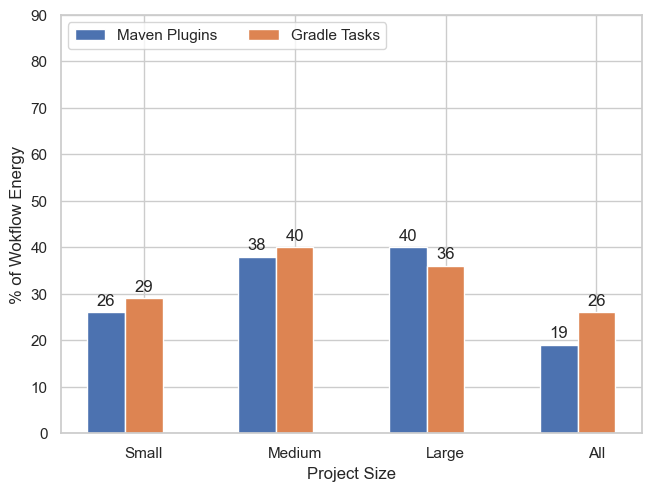

In [82]:
bar_energy = {
   # "maven" :  {},
    "mav_tasks": {},
   # "gradle" : {},
    "grad_tasks" : {},
    "total_maven"  : {},
    "total_gradle" : {}
}

for x in sizes2:
    #bar_energy["maven"][x]   = df_maven_size[x]["maven_energy"].sum()
    bar_energy["mav_tasks"][x]   = sum_maven[x]["energy"]
    #bar_energy["gradle"][x]  = df_gradle_size[x]["gradle_energy"].sum()
    bar_energy["grad_tasks"][x]  = sum_gradle[x]["energy"].sum()
    bar_energy["total_maven"][x]   = df_maven_size[x]["energy"].sum()
    bar_energy["total_gradle"][x]   = df_gradle_size[x]["energy"].sum()

#rq_aux.print_ratios_summary("Maven",          bar_energy["maven"],  bar_energy["total"])
rq_aux.print_ratios_summary("Maven Plugins",  bar_energy["mav_tasks"],  bar_energy["total_maven"])
#rq_aux.print_ratios_summary("Gradle",         bar_energy["gradle"], bar_energy["total"])
rq_aux.print_ratios_summary("Gradle Tasks",   bar_energy["grad_tasks"], bar_energy["total_gradle"])

properties  = ("Small", "Medium", "Large", "All")

bars = {
    #'Maven':  rq_aux.get_ratios(bar_energy["maven"],  bar_energy["total"], 0),
    'Maven Plugins':  rq_aux.get_ratios(bar_energy["mav_tasks"],  bar_energy["total_maven"], 0),
    #'Gradle': rq_aux.get_ratios(bar_energy["gradle"], bar_energy["total"], 0),
    'Gradle Tasks': rq_aux.get_ratios(bar_energy["grad_tasks"], bar_energy["total_gradle"], 0),
}

title = '% of Energy Related to Maven/Gradle Tasks by Size of Project'


rq_aux.plot_bars(properties, bars, title = '',lim=90, ylabel='% of Wokflow Energy', xlabel='Project Size')

In [83]:
df_all_maven = rq_aux.read_all_tasks(alltasks_dataset, "maven", noerror)

all_maven_energy = rq_aux.get_energy_all_tasks(df_all_maven)

Build tool maven = 138385
len small = 7767
Group len small = 88
len medium = 50629
Group len medium = 378
len large = 79989
Group len large = 277


In [84]:
for key, value in all_maven_energy.items():
    total_energy = sum_maven[key]['energy']
    assert abs(sum(value) - total_energy) < 0.000001, f"Different sum: {sum(value) - total_energy}"
    print(f"{key.title()}: Workflows: {len(value)}", end="")
    rq_aux.print_ratio(sum(value), sum(all_maven_energy['all']), '')

Small: Workflows: 88:  627180 (2.8%)
Medium: Workflows: 378:  10799508 (48.6%)
Large: Workflows: 277:  10787725 (48.6%)
All: Workflows: 743:  22214413 (100.0%)


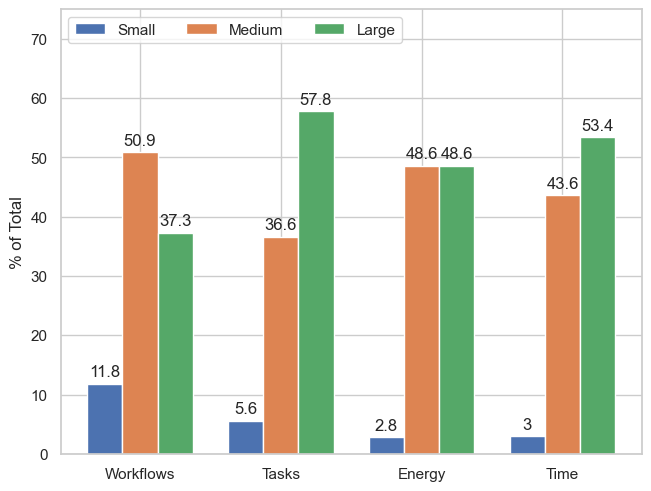

In [85]:
properties  = ("Workflows", "Tasks", "Energy", "Time")

bars = {}
for x in sizes1:
    bars[x.title()] = rq_aux.get_ratios(sum_maven[x], sum_maven['all'])

title = 'Number of Maven Projects, Energy Consumption and Execution Time by Size of Project'

rq_aux.plot_bars(properties, bars, '',lim=75)

In [86]:
df_all_gradle = rq_aux.read_all_tasks(alltasks_dataset, "gradle", noerror=False)

all_gradle_energy = rq_aux.get_energy_all_tasks(df_all_gradle)

Build tool gradle = 46150
len small = 1213
Group len small = 41
len medium = 17029
Group len medium = 240
len large = 27908
Group len large = 147


In [87]:
for key, value in all_gradle_energy.items():
    total_energy = sum_gradle[key]['energy']
    assert abs(sum(value) - total_energy) < 0.000001, f"Different sum: {sum(value) - total_energy}"
    print(f"{key.title()}: Workflows: {len(value)}", end="")
    rq_aux.print_ratio(sum(value), sum(all_gradle_energy['all']), '')

Small: Workflows: 41:  164351 (2.5%)
Medium: Workflows: 240:  2115760 (32.7%)
Large: Workflows: 147:  4184440 (64.7%)
All: Workflows: 428:  6464551 (100.0%)


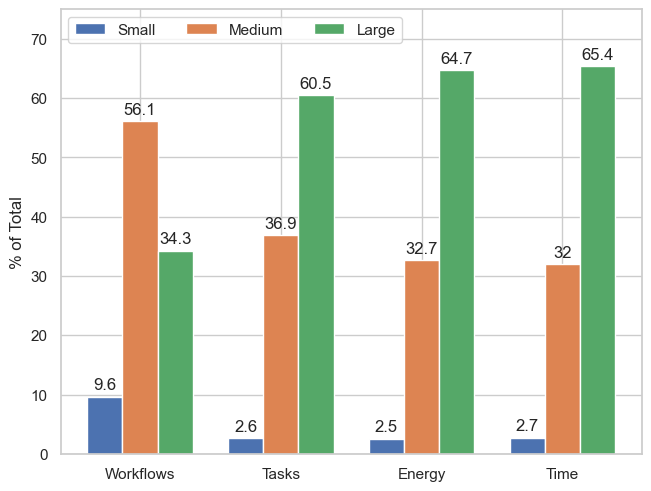

In [88]:
bars = {}
for x in sizes1:
    bars[x.title()] = rq_aux.get_ratios(sum_gradle[x], sum_gradle['all'])

title = 'Number of Gradle Workflows, Energy Consumption and Execution Time by Size of Project'

rq_aux.plot_bars(properties, bars, title='',lim=75)

Text(0, 0.5, '# Workflows')

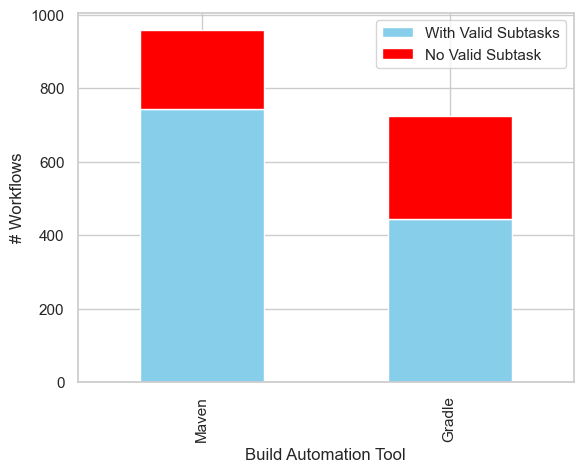

In [89]:
df = pd.DataFrame({'With Valid Subtasks' : [745, 444],
                   'No Valid Subtask'    : [213, 281],
                  },
                  index=['Maven', 'Gradle'])


df.plot(kind='bar', stacked=True, color=['skyblue', 'red'])

plt.xlabel('Build Automation Tool')
plt.ylabel('# Workflows')

#plt.title('Workflows with Valid Subtasks')

In [90]:
maven_energy = rq_aux.get_energy_all_tasks(df_all_maven, group=False, all=False)

len small = 7767
len medium = 50629
len large = 79989


In [91]:
gradle_energy = rq_aux.get_energy_all_tasks(df_all_gradle, group=False, all=False)

len small = 1213
len medium = 17029
len large = 27908


In [92]:
# Normality of the Energy Consumption of Maven tasks
for key, value in maven_energy.items():
  rq_aux.test_normality(value)

# Normality of the Energy Consumption of Gradle tasks
for key, value in gradle_energy.items():
  rq_aux.test_normality(value)


stat=18095.843, p=0.000
probably non gaussian
stat=207005.145, p=0.000
probably non gaussian
stat=253737.410, p=0.000
probably non gaussian
stat=2473.992, p=0.000
probably non gaussian
stat=52772.337, p=0.000
probably non gaussian
stat=89418.031, p=0.000
probably non gaussian


In [93]:
#perform the Mann-Whitney U test
print(stats.kruskal(*maven_energy.values()))

print("Small x Medium = ", stats.mannwhitneyu(maven_energy['small'], maven_energy['medium']))

print("Small x Large = ",stats.mannwhitneyu(maven_energy['small'], maven_energy['large']))

print("Medium x Large = ", stats.mannwhitneyu(maven_energy['medium'], maven_energy['large']))

KruskalResult(statistic=58.60868234403017, pvalue=1.876231111777449e-13)
Small x Medium =  MannwhitneyuResult(statistic=202787588.0, pvalue=8.192078004169334e-06)
Small x Large =  MannwhitneyuResult(statistic=324296815.0, pvalue=1.47137340691e-10)
Medium x Large =  MannwhitneyuResult(statistic=2058536169.0, pvalue=4.000304018672437e-07)


In [94]:
# https://pypi.org/project/cliffs-delta/
from cliffs_delta import cliffs_delta

d, res = cliffs_delta(maven_energy['small'], maven_energy['medium'])
print(d,res)

d, res = cliffs_delta(maven_energy['small'], maven_energy['large'])
print(d,res)

d, res = cliffs_delta(maven_energy['medium'], maven_energy['large'])
print(d,res)

0.031380012203020065 negligible
0.04397261472943968 negligible
0.01662054190670815 negligible


In [95]:
# median and mean
def print_mean_median (msg, lst):
    print(f"{msg}, mean: {np.mean(lst):2f}, median: {np.median(lst):.2f}, std: {np.std(lst):.2f}")
    
for key, value in maven_energy.items():
  print_mean_median(key.title(), value)

Small, mean: 80.749369, median: 13.58, std: 657.77
Medium, mean: 213.306766, median: 11.57, std: 7197.89
Large, mean: 134.865102, median: 12.71, std: 2681.92


In [96]:
#perform the Mann-Whitney U test
print(stats.kruskal(*gradle_energy.values()))

print("Small x Medium = ", stats.mannwhitneyu(gradle_energy['small'], gradle_energy['medium']))

print("Small x Large = ",stats.mannwhitneyu(gradle_energy['small'], gradle_energy['large']))

print("Medium x Large = ", stats.mannwhitneyu(gradle_energy['medium'], gradle_energy['large']))

KruskalResult(statistic=721.2673892746097, pvalue=2.392084024474985e-157)
Small x Medium =  MannwhitneyuResult(statistic=9750390.0, pvalue=0.0011140989996805653)
Small x Large =  MannwhitneyuResult(statistic=18663504.0, pvalue=1.3508804999181353e-09)
Medium x Large =  MannwhitneyuResult(statistic=273236725.0, pvalue=5.2372072518120215e-157)


In [97]:
# https://pypi.org/project/cliffs-delta/
from cliffs_delta import cliffs_delta

d, res = cliffs_delta(gradle_energy['small'], gradle_energy['medium'])
print(d,res)

d, res = cliffs_delta(gradle_energy['small'], gradle_energy['large'])
print(d,res)

d, res = cliffs_delta(gradle_energy['medium'], gradle_energy['large'])
print(d,res)

-0.05593469691898941 negligible
0.10263980070662042 negligible
0.14987652314278807 small


In [98]:
for key, value in gradle_energy.items():
  print_mean_median(key.title(), value)

Small, mean: 135.491536, median: 17.01, std: 1141.64
Medium, mean: 124.244546, median: 17.66, std: 1575.07
Large, mean: 149.936923, median: 14.59, std: 2425.23


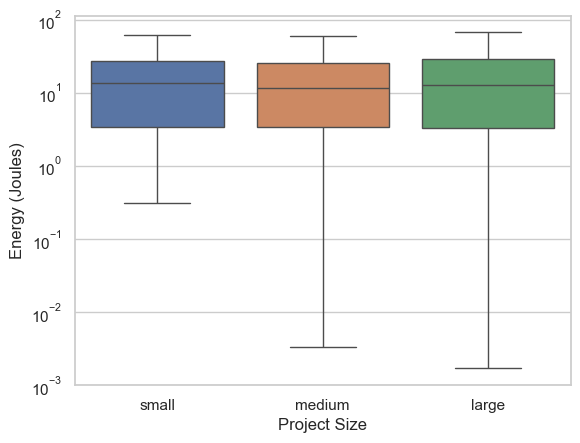

In [99]:
g = sns.boxplot(data = maven_energy, showfliers=False)#, log_scale=10)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

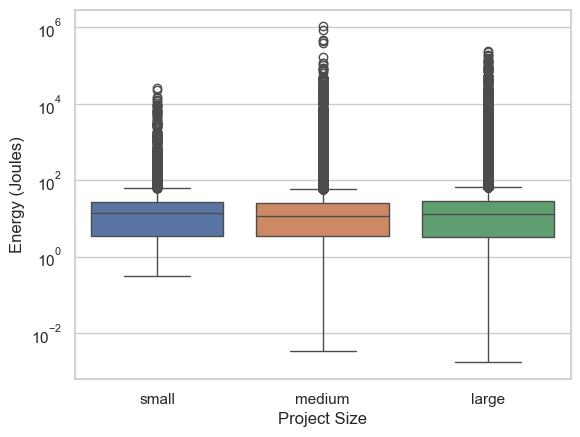

In [100]:
g = sns.boxplot(data = maven_energy, showfliers=True)#, log_scale=10)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

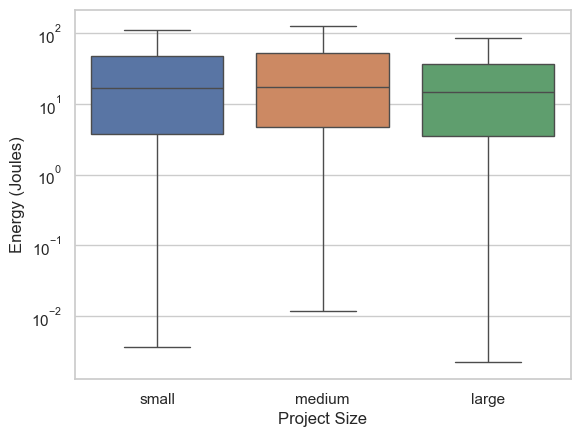

In [101]:
g = sns.boxplot(data = gradle_energy, showfliers=False)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

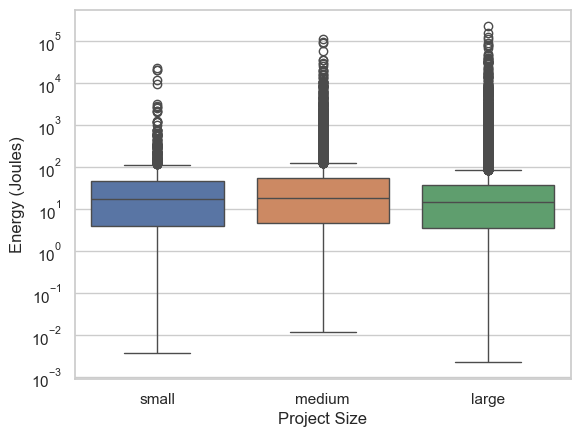

In [102]:
g = sns.boxplot(data = gradle_energy, showfliers=True)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

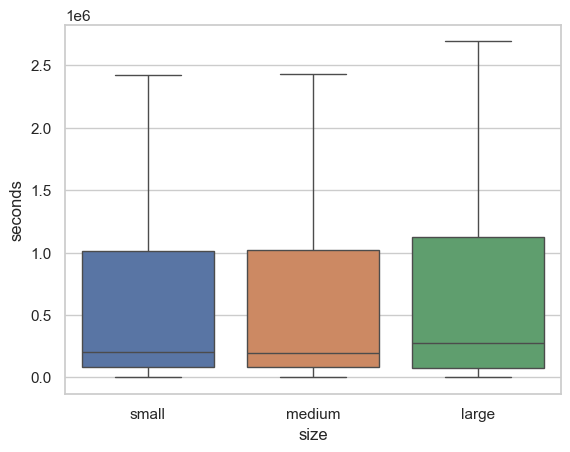

In [103]:
g = sns.boxplot(x = 'size', y = 'seconds', data = df_all_maven, showfliers=False, hue="size", order=sizes1)#, palette=my_colors) 

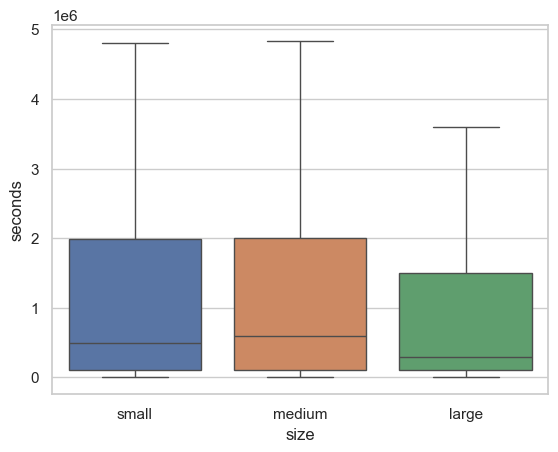

In [104]:
g = sns.boxplot(x = 'size', y = 'seconds', data = df_all_gradle, showfliers=False, hue="size", order=sizes1)#, palette=my_colors) 